In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib import rcParams

rcParams["figure.dpi"] = 150

In [2]:
def campo_cuadrado(x):
    # x=campo electrico
    E_2=x**2
    return E_2

In [3]:
def incert_campo_cuadrado(i,j):
    # i=campo electrico
    # j=incertidumbre medida directa campo
    s_E_2=2*i*j
    return s_E_2

In [4]:
def factor_rizado(a):
    # a=pendiente del ajuste campo_cuadrado-potencia_transmitida
    factor_riz=(50/(0.215**2))/a
    return factor_riz

In [5]:
def incertidumbre_directa(b):
    # b=oscilacion de la medida
    S=b/np.sqrt(3)
    return S

In [6]:
def incertudumbre_rizado(y,k):
    # y=incertidumbre de la pendiente
    # k=pendiente del ajuste campo_cuadrado-potencia_transmitida
    s_r=(50/(0.215**2))*(y/(k**2))
    return s_r

In [7]:
data_1=np.loadtxt('Frecuencia_1a.txt')

In [8]:
potencia_1=data_1[:,0]

In [9]:
campo_1=data_1[:,1]

Antes de hacer la regresion lineal calculo $E^2$, $s(E^2)$ y las incertidumbres directas:

In [10]:
E_1=campo_cuadrado(campo_1)

Para las oscilaciones de las medidas tendremos que:
$\Delta E=0.3$, $\Delta P_i=0.003$ y $\Delta P_r=0.001$

In [11]:
oscilaciones=np.array([0.3,0.003,0.001])

Obteniendo las incertidumbres directas:

In [12]:
incertidumbres_E_Pi_Pr=incertidumbre_directa(oscilaciones)
print(incertidumbres_E_Pi_Pr)

[0.17320508 0.00173205 0.00057735]


Ahora la incertidumbre $s(E^2)$:

In [13]:
S_E2_1=incert_campo_cuadrado(campo_1,0.173)

Realicemos la regresión lineal $E^2=a*P$

In [14]:
reg=linregress(potencia_1,E_1)

Obteniendo la pendiente a y su incertidumbre s(a):

In [15]:
a=reg.slope
print(a)

846.51120648194


In [16]:
s_a=reg.stderr
print(s_a)

10.709000435696371


Calculemos ahora el factor de rizado(F_R_1) para esta pendiente y su incertidumbre(S_F_R_1):

In [17]:
F_R_1=factor_rizado(a)
print(F_R_1)

1.277792611599178


In [18]:
S_F_R_1=incertudumbre_rizado(s_a,a)
print(S_F_R_1)

0.0161650330551615


Vamos a graficas nuestros datos y el ajuste:

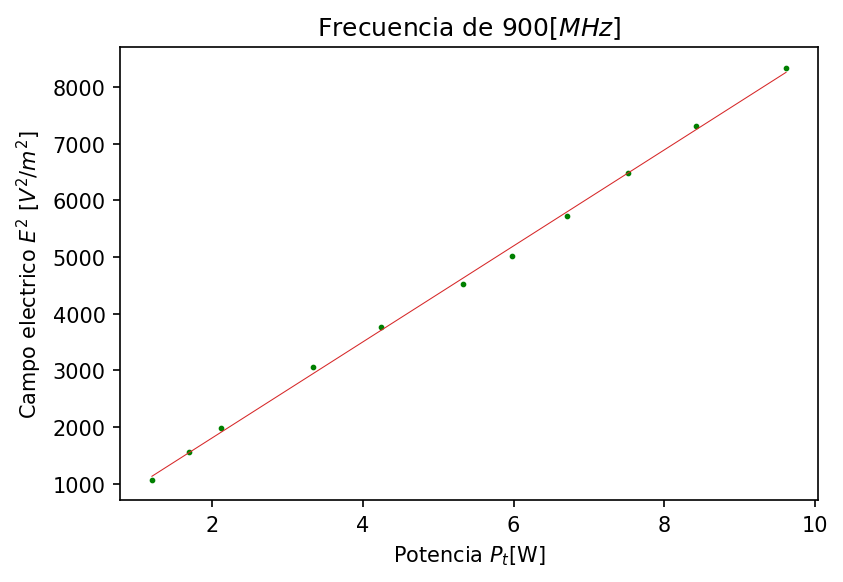

In [19]:
potencia_1_reg=np.array([potencia_1.min(),potencia_1.max()])
E_1_reg= a * potencia_1_reg + reg.intercept


plt.scatter(potencia_1,E_1, s=3, color='green')

plt.plot(potencia_1_reg,E_1_reg, color='C3', linewidth=0.5)

plt.xlabel('Potencia $P_t$[W]')
plt.ylabel('Campo electrico $E^2$ $[V^2/m^2]$')
plt.title('Frecuencia de $900[MHz]$')

plt.show()

#### Pasamos a hacer las dos ultimas frecuencias

In [20]:
data_2=np.loadtxt('Frecuencia_2a.txt')
data_3=np.loadtxt('Frecuencia_3a.txt')

In [21]:
potencia_2 = data_2[:,0]

In [22]:
campo_2 = data_2[:,1]

In [23]:
potencia_3 = data_3[:,0]

In [24]:
campo_3 = data_3[:,1]

Sacamos los campos al cuadrado y sus incertidumbres, E_2 con S_E2_2 y E_3 con S_E2_3:

In [25]:
E_2=campo_cuadrado(campo_2)
S_E2_2=incert_campo_cuadrado(campo_2,0.173)
E_3=campo_cuadrado(campo_3)
S_E2_3=incert_campo_cuadrado(campo_3,0.173)

Hagamos ahora las regresiones lineales $E^2=a*P$:

In [26]:
reg_2=linregress(potencia_2,E_2)
reg_3=linregress(potencia_3,E_3)

Calculemos ahora el factor de rizado(F_R_2 y F_R_3) para esta pendiente y su incertidumbre(S_F_R_2 y S_F_R_3):

In [27]:
pendiente_2=reg_2.slope
pendiente_3=reg_3.slope
s_pendiente_2=reg_2.stderr
s_pendiente_3=reg_3.stderr
F_R_2=factor_rizado(pendiente_2)
S_F_R_2=incertudumbre_rizado(s_pendiente_2,pendiente_2)
F_R_3=factor_rizado(pendiente_3)
S_F_R_3=incertudumbre_rizado(s_pendiente_3,pendiente_3)

In [28]:
print(F_R_2)

1.0315761982302065


In [29]:
print(S_F_R_2)

0.011425829886548021


In [30]:
print(F_R_3)

1.0644531102227417


In [31]:
print(S_F_R_3)

0.016312328962744073


Graficamos datos y ajustes:

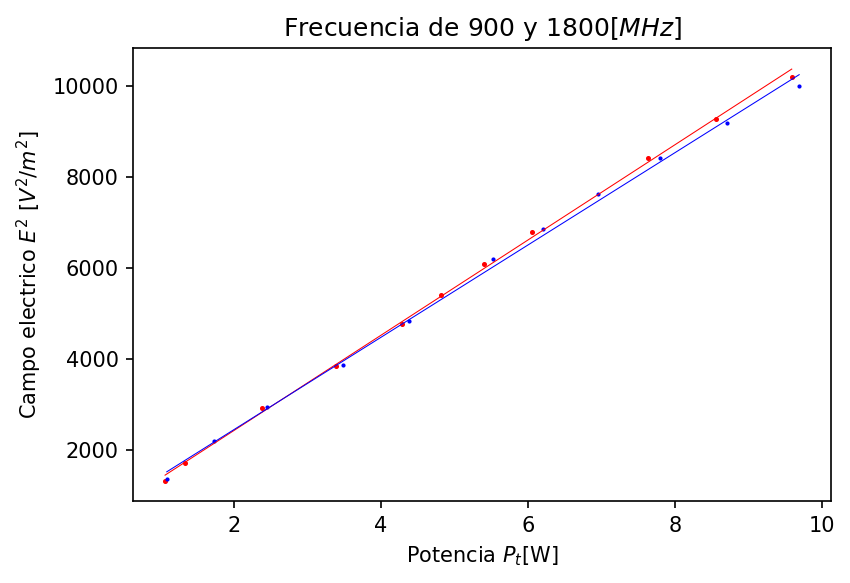

In [32]:
potencia_2_reg=np.array([potencia_2.min(),potencia_2.max()])
E_2_reg= pendiente_2 * potencia_2_reg + reg_2.intercept

potencia_3_reg=np.array([potencia_3.min(),potencia_3.max()])
E_3_reg= pendiente_3 * potencia_3_reg + reg_3.intercept


plt.scatter(potencia_2,E_2, s=2, color='red')

plt.scatter(potencia_3,E_3, s=1, color='blue')

plt.plot(potencia_2_reg,E_2_reg, color='red', linewidth=0.5)

plt.plot(potencia_3_reg,E_3_reg, color='blue', linewidth=0.5)

plt.xlabel('Potencia $P_t$[W]')
plt.ylabel('Campo electrico $E^2$ $[V^2/m^2]$')
plt.title('Frecuencia de $900$ y $1800$$[MHz]$')

plt.show()

# Gráfica y datos finales:

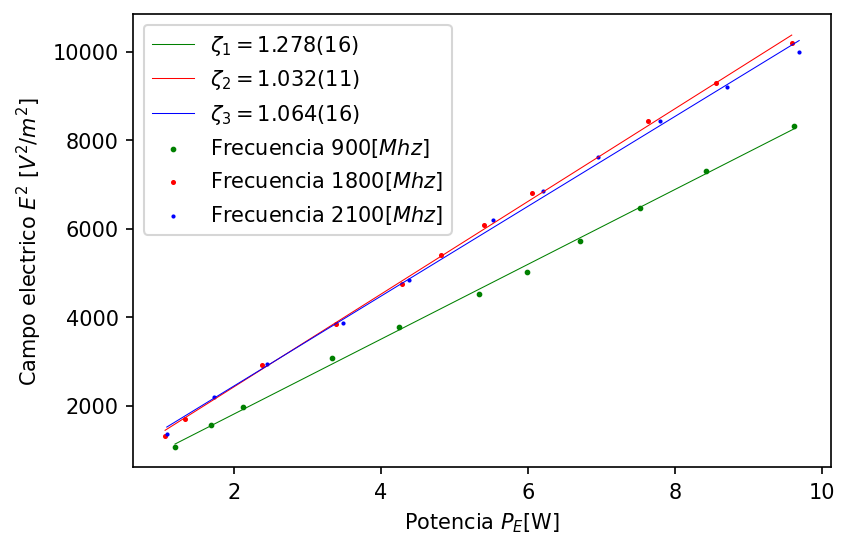

In [37]:
plt.plot(potencia_1_reg,E_1_reg, color='green', linewidth=0.5, label='$\zeta_1=1.278(16)$')

plt.plot(potencia_2_reg,E_2_reg, color='red', linewidth=0.5, label='$\zeta_2=1.032(11)$')

plt.plot(potencia_3_reg,E_3_reg, color='blue', linewidth=0.5, label='$\zeta_3=1.064(16)$')

plt.scatter(potencia_1,E_1, s=3, color='green', label='Frecuencia $900[Mhz]$')

plt.scatter(potencia_2,E_2, s=2, color='red', label='Frecuencia $1800[Mhz]$')

plt.scatter(potencia_3,E_3, s=1, color='blue', label='Frecuencia $2100[Mhz]$')

plt.xlabel('Potencia $P_E$[W]')
plt.ylabel('Campo electrico $E^2$ $[V^2/m^2]$')
plt.legend()

plt.savefig('Grafica_Factor_R.pdf')

plt.show()

# Para la frecuencia de 900Mhz obtenemos

In [34]:
print(potencia_1)
print(campo_1)
print(E_1)
print(S_E2_1)

[1.198 1.686 2.117 3.339 4.239 5.334 5.982 6.707 7.518 8.416 9.617]
[32.7 39.5 44.5 55.4 61.4 67.3 70.8 75.7 80.5 85.5 91.3]
[1069.29 1560.25 1980.25 3069.16 3769.96 4529.29 5012.64 5730.49 6480.25
 7310.25 8335.69]
[11.3142 13.667  15.397  19.1684 21.2444 23.2858 24.4968 26.1922 27.853
 29.583  31.5898]


# Para la frecuencia de 1800Mhz obtenemos

In [35]:
print(potencia_2)
print(campo_2)
print(E_2)
print(S_E2_2)

[1.063 1.338 2.379 3.393 4.286 4.809 5.397 6.057 7.629 8.561 9.586]
[ 36.3  41.3  54.   62.1  69.   73.5  78.   82.5  91.8  96.4 101. ]
[ 1317.69  1705.69  2916.    3856.41  4761.    5402.25  6084.    6806.25
  8427.24  9292.96 10201.  ]
[12.5598 14.2898 18.684  21.4866 23.874  25.431  26.988  28.545  31.7628
 33.3544 34.946 ]


# Para la frecuencia de 2100Mhz obtenemos

In [36]:
print(potencia_3)
print(campo_3)
print(E_3)
print(S_E2_3)

[1.086 1.731 2.454 3.479 4.385 5.527 6.2   6.952 7.791 8.707 9.687]
[ 36.8  46.8  54.2  62.2  69.6  78.7  82.8  87.3  91.8  95.9 100. ]
[ 1354.24  2190.24  2937.64  3868.84  4844.16  6193.69  6855.84  7621.29
  8427.24  9196.81 10000.  ]
[12.7328 16.1928 18.7532 21.5212 24.0816 27.2302 28.6488 30.2058 31.7628
 33.1814 34.6   ]
